In [1]:
!pip install nltk


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
mystopwords = set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
import seaborn as sns
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\praka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\praka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
!pip install wordcloud

                                              0.0/151.4 kB ? eta -:--:--
     --------                                 30.7/151.4 kB ? eta -:--:--
     --------                                 30.7/151.4 kB ? eta -:--:--
     --------                                 30.7/151.4 kB ? eta -:--:--
     --------                                 30.7/151.4 kB ? eta -:--:--
     --------------------------           112.6/151.4 kB 467.6 kB/s eta 0:00:01
     --------------------------           112.6/151.4 kB 467.6 kB/s eta 0:00:01
     --------------------------           112.6/151.4 kB 467.6 kB/s eta 0:00:01
     --------------------------           112.6/151.4 kB 467.6 kB/s eta 0:00:01
     ----------------------------------   143.4/151.4 kB 327.9 kB/s eta 0:00:01
     ------------------------------------ 151.4/151.4 kB 334.6 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
df = pd.read_csv('./FinalBalancedDataset.csv')

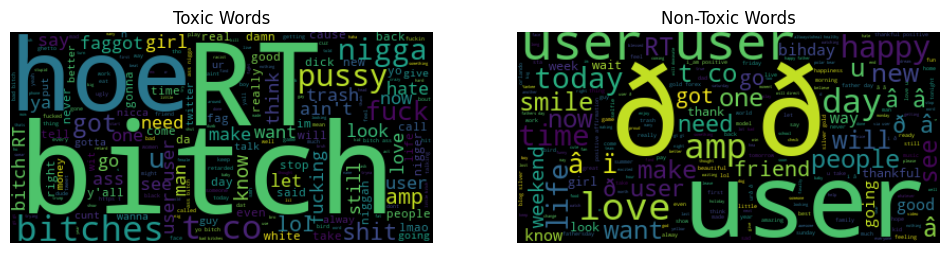

In [3]:
toxic_words = ' '.join(df[df['Toxicity'] == 1]['tweet'])
non_toxic_words = ' '.join(df[df['Toxicity'] == 0]['tweet'])

toxic_wordcloud = WordCloud().generate(toxic_words)
non_toxic_wordcloud = WordCloud().generate(non_toxic_words)

# Plot the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(toxic_wordcloud, interpolation='bilinear')
plt.title('Toxic Words')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(non_toxic_wordcloud, interpolation='bilinear')
plt.title('Non-Toxic Words')
plt.axis('off')

plt.show()

In [3]:
tokenizer = RegexpTokenizer(r"\w+")
lemmatizer = WordNetLemmatizer()
clean_text = []
for index in df.index:
    tweets = df.iloc[index]['tweet']
    tweets = tweets.lower()
    tokens = tokenizer.tokenize(tweets)
    tweet_token =[]
    for token in tokens:
        if token not in mystopwords and token.isalpha():
            token = lemmatizer.lemmatize(token)
            tweet_token.append(token)
    clean_text.append(" ".join(tweet_token))
df['clean_text'] = clean_text


In [9]:
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(df['clean_text'])
X = X.toarray()
y = df['Toxicity'].values

In [10]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

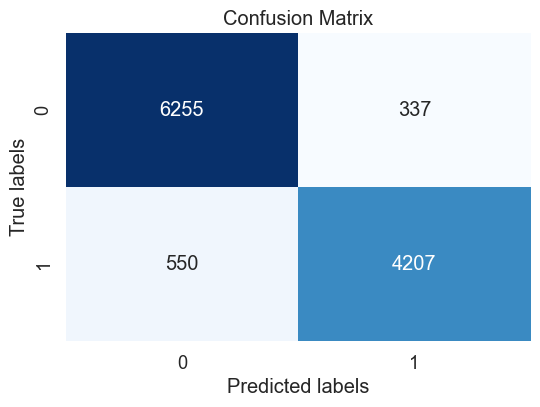

RandomForestClassifier Test_Accuracy 0.9218433342144682
RandomForestClassifier Test_Precision Score 0.9258362676056338
RandomForestClassifier Test_Recall 0.88438091233971
RandomForestClassifier Test_f1 Score 0.9046339103322223


In [7]:
classifier = RandomForestClassifier()

classifier.fit(x_train,y_train)
train_predict = classifier.predict(x_train)
test_predict = classifier.predict(x_test)
cm = confusion_matrix(y_test, test_predict)

plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2) 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()
# print(classifier.__class__.__name__,'Train_Accuracy',accuracy_score(y_train,train_predict))
print(classifier.__class__.__name__,'Test_Accuracy',accuracy_score(y_test,test_predict))
print(classifier.__class__.__name__,'Test_Precision Score',precision_score(y_test,test_predict))
print(classifier.__class__.__name__,'Test_Recall',recall_score(y_test,test_predict))
print(classifier.__class__.__name__,'Test_f1 Score',f1_score(y_test,test_predict))

In [ ]:
df = pd.DataFrame({'Test_Accuracy':accuracy_score(y_test,test_predict),
                  'Test_Precision Score' :precision_score(y_test,test_predict),
                  'Test_Recall':recall_score(y_test,test_predict),
                  'Test_f1 Score':f1_score(y_test,test_predict)
                  })
df

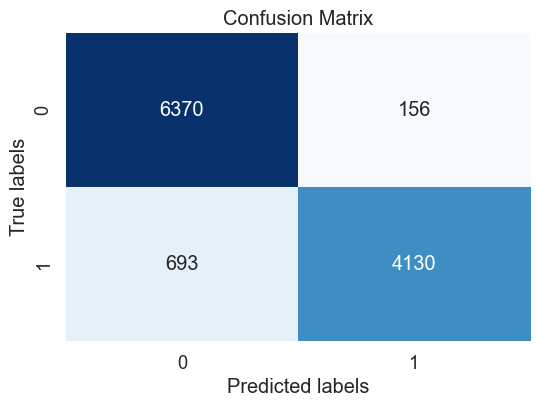

SVC Test_Accuracy 0.9251916468411314
SVC Test_Accuracy 0.9636024265048997
SVC Test_Accuracy 0.8563134978229318
SVC Test_Accuracy 0.9067954770007685


In [13]:
classifier = SVC()

classifier.fit(x_train,y_train)
train_predict = classifier.predict(x_train)
test_predict = classifier.predict(x_test)
cm = confusion_matrix(y_test, test_predict)

plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2) 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()
# print(classifier.__class__.__name__,'Train_Accuracy',accuracy_score(y_train,train_predict))
print(classifier.__class__.__name__,'Test_Accuracy',accuracy_score(y_test,test_predict))
print(classifier.__class__.__name__,'Test_Accuracy',precision_score(y_test,test_predict))
print(classifier.__class__.__name__,'Test_Accuracy',recall_score(y_test,test_predict))
print(classifier.__class__.__name__,'Test_Accuracy',f1_score(y_test,test_predict))

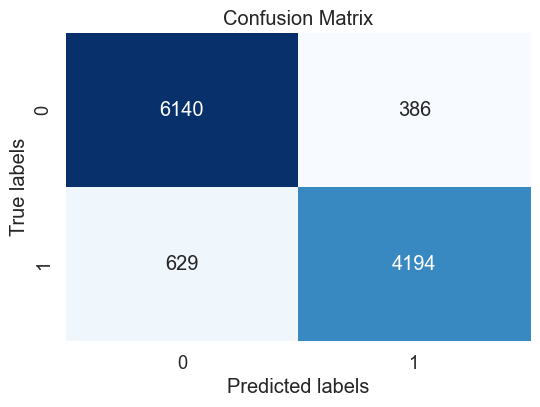

DecisionTreeClassifier Test_Accuracy 0.910564807472024
DecisionTreeClassifier Test_Accuracy 0.9157205240174673
DecisionTreeClassifier Test_Accuracy 0.8695832469417375
DecisionTreeClassifier Test_Accuracy 0.8920557268956716


In [14]:
classifier = DecisionTreeClassifier()

classifier.fit(x_train,y_train)
train_predict = classifier.predict(x_train)
test_predict = classifier.predict(x_test)
cm = confusion_matrix(y_test, test_predict)

plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)  
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()
# print(classifier.__class__.__name__,'Train_Accuracy',accuracy_score(y_train,train_predict))
print(classifier.__class__.__name__,'Test_Accuracy',accuracy_score(y_test,test_predict))
print(classifier.__class__.__name__,'Test_Accuracy',precision_score(y_test,test_predict))
print(classifier.__class__.__name__,'Test_Accuracy',recall_score(y_test,test_predict))
print(classifier.__class__.__name__,'Test_Accuracy',f1_score(y_test,test_predict))

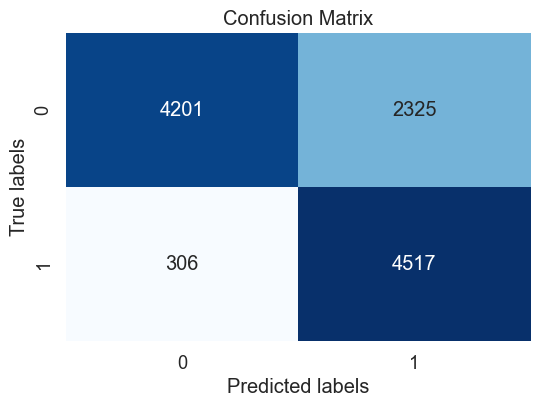

GaussianNB Test_Accuracy 0.7681734073486651
GaussianNB Test_Accuracy 0.6601870798012277
GaussianNB Test_Accuracy 0.9365540120257101
GaussianNB Test_Accuracy 0.7744534933561936


In [15]:
classifier = GaussianNB()

classifier.fit(x_train,y_train)
train_predict = classifier.predict(x_train)
test_predict = classifier.predict(x_test)
cm = confusion_matrix(y_test, test_predict)

plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)  
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()
# print(classifier.__class__.__name__,'Train_Accuracy',accuracy_score(y_train,train_predict))
print(classifier.__class__.__name__,'Test_Accuracy',accuracy_score(y_test,test_predict))
print(classifier.__class__.__name__,'Test_Accuracy',precision_score(y_test,test_predict))
print(classifier.__class__.__name__,'Test_Accuracy',recall_score(y_test,test_predict))
print(classifier.__class__.__name__,'Test_Accuracy',f1_score(y_test,test_predict))

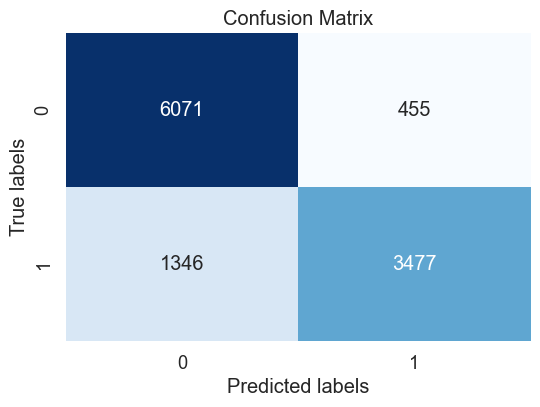

KNeighborsClassifier Test_Accuracy 0.8413076041942021
KNeighborsClassifier Test_Accuracy 0.8842828077314344
KNeighborsClassifier Test_Accuracy 0.7209205888451171
KNeighborsClassifier Test_Accuracy 0.7942889777270131


In [16]:
classifier = KNeighborsClassifier()

classifier.fit(x_train,y_train)
train_predict = classifier.predict(x_train)
test_predict = classifier.predict(x_test)
cm = confusion_matrix(y_test, test_predict)

plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)  
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()
# print(classifier.__class__.__name__,'Train_Accuracy',accuracy_score(y_train,train_predict))
print(classifier.__class__.__name__,'Test_Accuracy',accuracy_score(y_test,test_predict))
print(classifier.__class__.__name__,'Test_Accuracy',precision_score(y_test,test_predict))
print(classifier.__class__.__name__,'Test_Accuracy',recall_score(y_test,test_predict))
print(classifier.__class__.__name__,'Test_Accuracy',f1_score(y_test,test_predict))

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

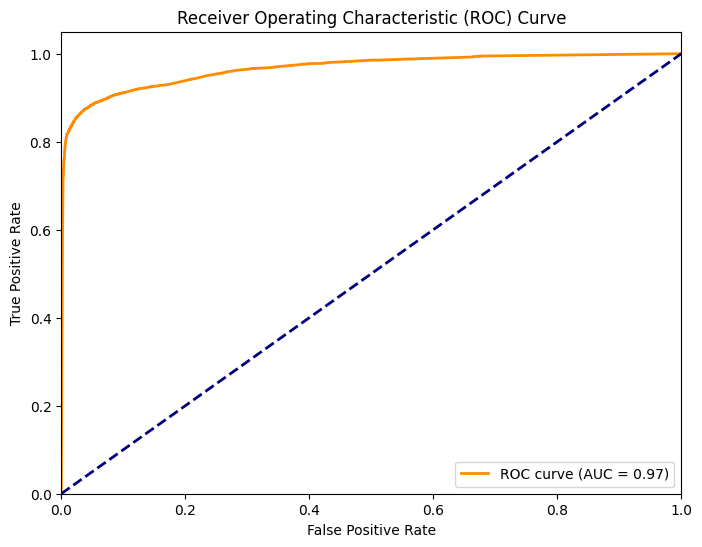

In [8]:
classifier = RandomForestClassifier()

# Fit the classifier and obtain predicted probabilities for the positive class
classifier.fit(x_train, y_train)
y_scores = classifier.predict_proba(x_test)[:,1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC (Area Under the Curve) for the ROC curve
roc_auc = roc_auc_score(y_test, y_scores)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(classifier.__class__.__name__,'Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


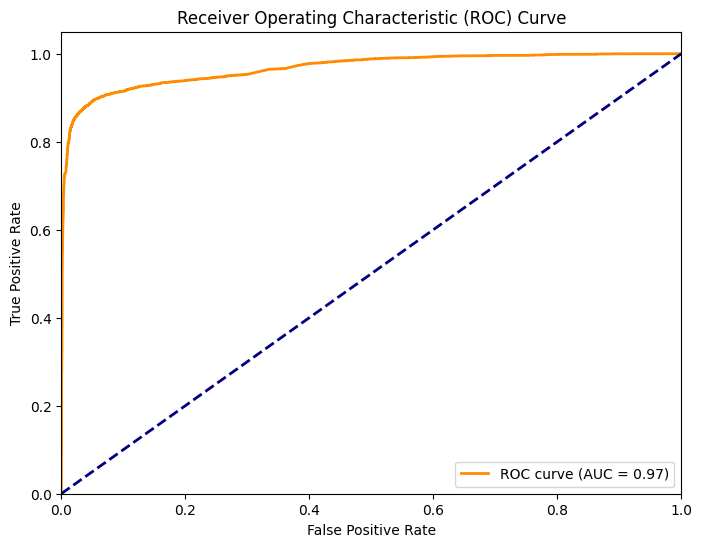

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

classifier = SVC(probability=True)

classifier.fit(x_train, y_train)
y_scores = classifier.predict_proba(x_test)[:,1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC (Area Under the Curve) for the ROC curve
roc_auc = roc_auc_score(y_test, y_scores)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

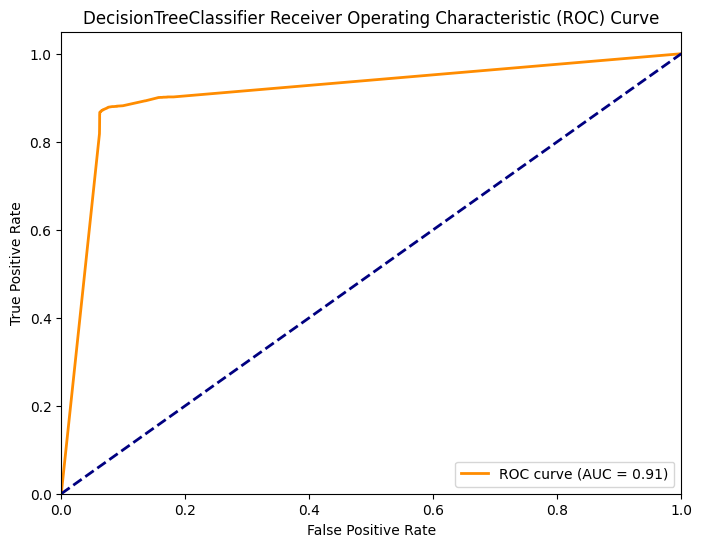

In [12]:
classifier = DecisionTreeClassifier()

# Fit the classifier and obtain predicted probabilities for the positive class
classifier.fit(x_train, y_train)
y_scores = classifier.predict_proba(x_test)[:,1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC (Area Under the Curve) for the ROC curve
roc_auc = roc_auc_score(y_test, y_scores)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DecisionTreeClassifier Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

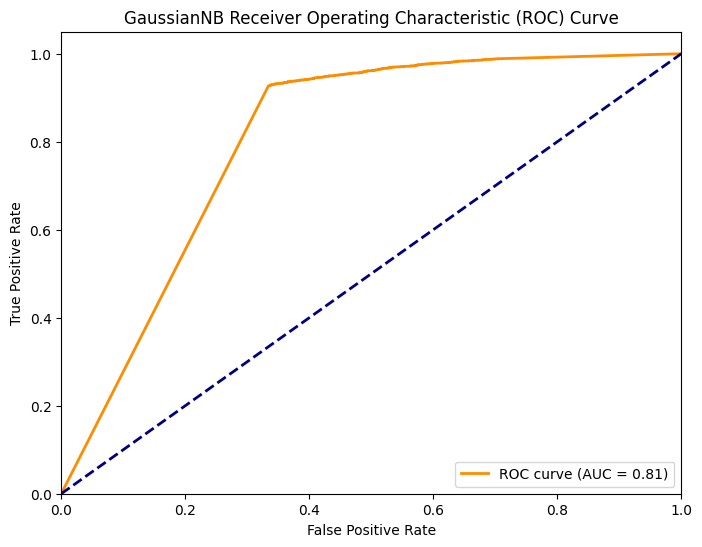

In [13]:
classifier = GaussianNB()

# Fit the classifier and obtain predicted probabilities for the positive class
classifier.fit(x_train, y_train)
y_scores = classifier.predict_proba(x_test)[:,1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC (Area Under the Curve) for the ROC curve
roc_auc = roc_auc_score(y_test, y_scores)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GaussianNB Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

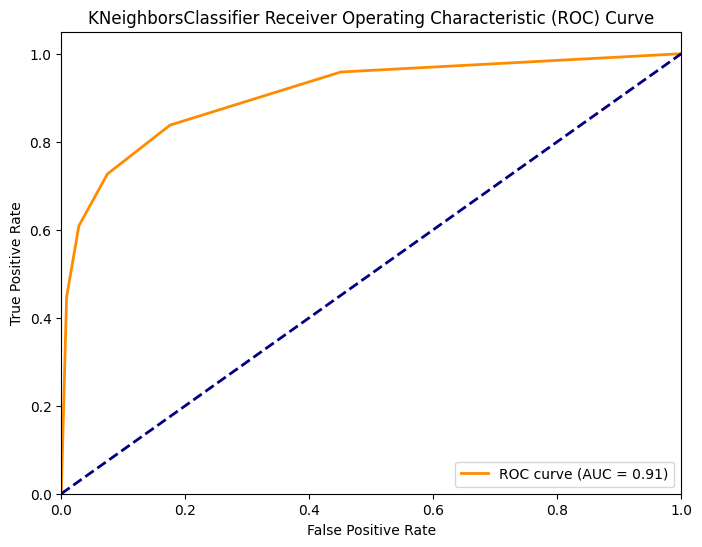

In [14]:
classifier = KNeighborsClassifier()

# Fit the classifier and obtain predicted probabilities for the positive class
classifier.fit(x_train, y_train)
y_scores = classifier.predict_proba(x_test)[:,1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC (Area Under the Curve) for the ROC curve
roc_auc = roc_auc_score(y_test, y_scores)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNeighborsClassifier Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [4]:
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df['clean_text'])
y_bow = df['Toxicity'].values

In [6]:
x_train_bow,x_test_bow,y_train_bow,y_test_bow = train_test_split(X_bow,y_bow,test_size=0.2)

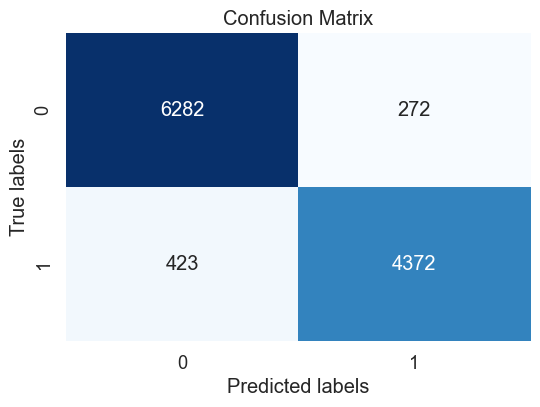

RandomForestClassifier Test_Accuracy 0.9387611243281346
RandomForestClassifier Test_Precision Score 0.9414298018949182
RandomForestClassifier Test_Recall 0.9117831074035454
RandomForestClassifier Test_f1 Score 0.9263693187837694


In [7]:
classifier = RandomForestClassifier()

classifier.fit(x_train_bow,y_train_bow)
train_predict_bow = classifier.predict(x_train_bow)
test_predict_bow = classifier.predict(x_test_bow)
cm = confusion_matrix(y_test_bow, test_predict_bow)

plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2) 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()
# print(classifier.__class__.__name__,'Train_Accuracy',accuracy_score(y_train,train_predict))
print(classifier.__class__.__name__,'Test_Accuracy',accuracy_score(y_test_bow,test_predict_bow))
print(classifier.__class__.__name__,'Test_Precision Score',precision_score(y_test_bow,test_predict_bow))
print(classifier.__class__.__name__,'Test_Recall',recall_score(y_test_bow,test_predict_bow))
print(classifier.__class__.__name__,'Test_f1 Score',f1_score(y_test_bow,test_predict_bow))

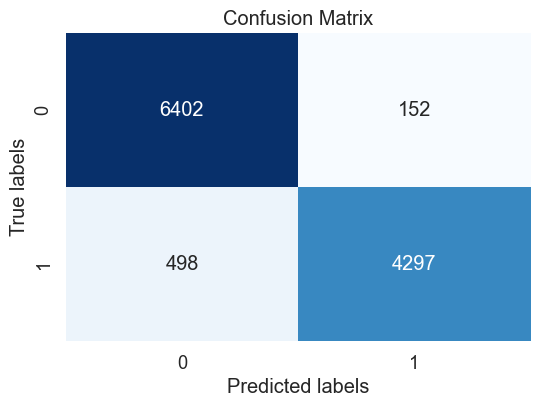

SVC Test_Accuracy 0.9427262313860252
SVC Test_Accuracy 0.9658350191054169
SVC Test_Accuracy 0.8961418143899895
SVC Test_Accuracy 0.9296841194288188


In [11]:
classifier = SVC()

classifier.fit(x_train_bow,y_train_bow)
train_predict_bow = classifier.predict(x_train_bow)
test_predict_bow = classifier.predict(x_test_bow)
cm = confusion_matrix(y_test_bow, test_predict_bow)

plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2) 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()
# print(classifier.__class__.__name__,'Train_Accuracy',accuracy_score(y_train,train_predict))
print(classifier.__class__.__name__,'Test_Accuracy',accuracy_score(y_test_bow,test_predict_bow))
print(classifier.__class__.__name__,'Test_Accuracy',precision_score(y_test_bow,test_predict_bow))
print(classifier.__class__.__name__,'Test_Accuracy',recall_score(y_test_bow,test_predict_bow))
print(classifier.__class__.__name__,'Test_Accuracy',f1_score(y_test_bow,test_predict_bow))

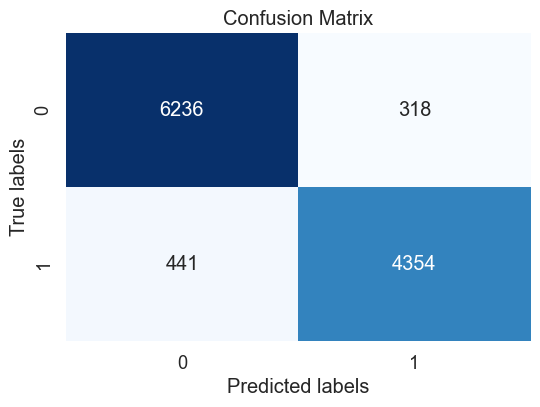

DecisionTreeClassifier Test_Accuracy 0.9331218609569125
DecisionTreeClassifier Test_Accuracy 0.9319349315068494
DecisionTreeClassifier Test_Accuracy 0.908029197080292
DecisionTreeClassifier Test_Accuracy 0.9198267666631457


In [8]:
classifier = DecisionTreeClassifier()

classifier.fit(x_train_bow,y_train_bow)
train_predict_bow = classifier.predict(x_train_bow)
test_predict_bow = classifier.predict(x_test_bow)
cm = confusion_matrix(y_test_bow, test_predict_bow)

plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)  
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()
print(classifier.__class__.__name__,'Test_Accuracy',accuracy_score(y_test_bow,test_predict_bow))
print(classifier.__class__.__name__,'Test_Accuracy',precision_score(y_test_bow,test_predict_bow))
print(classifier.__class__.__name__,'Test_Accuracy',recall_score(y_test_bow,test_predict_bow))
print(classifier.__class__.__name__,'Test_Accuracy',f1_score(y_test_bow,test_predict_bow))

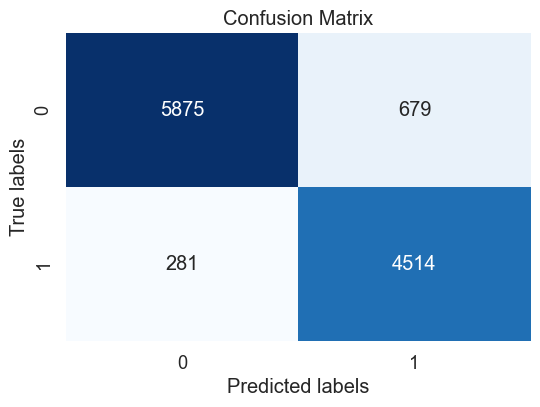

MultinomialNB Test_Accuracy 0.915411049431668
MultinomialNB Test_Accuracy 0.8692470633545157
MultinomialNB Test_Accuracy 0.9413972888425444
MultinomialNB Test_Accuracy 0.9038846615939127


In [14]:
classifier = MultinomialNB()

classifier.fit(x_train_bow,y_train_bow)
train_predict_bow = classifier.predict(x_train_bow)
test_predict_bow = classifier.predict(x_test_bow)
cm = confusion_matrix(y_test_bow, test_predict_bow)

plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)  
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()
# print(classifier.__class__.__name__,'Train_Accuracy',accuracy_score(y_train,train_predict))
print(classifier.__class__.__name__,'Test_Accuracy',accuracy_score(y_test_bow,test_predict_bow))
print(classifier.__class__.__name__,'Test_Accuracy',precision_score(y_test_bow,test_predict_bow))
print(classifier.__class__.__name__,'Test_Accuracy',recall_score(y_test_bow,test_predict_bow))
print(classifier.__class__.__name__,'Test_Accuracy',f1_score(y_test_bow,test_predict_bow))

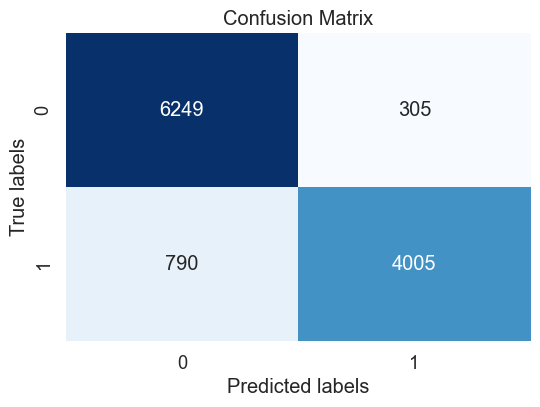

KNeighborsClassifier Test_Accuracy 0.9035157282579963
KNeighborsClassifier Test_Accuracy 0.9292343387470998
KNeighborsClassifier Test_Accuracy 0.835245046923879
KNeighborsClassifier Test_Accuracy 0.8797364085667215


In [10]:
classifier = KNeighborsClassifier()

classifier.fit(x_train_bow,y_train_bow)
train_predict_bow = classifier.predict(x_train_bow)
test_predict_bow = classifier.predict(x_test_bow)
cm = confusion_matrix(y_test_bow, test_predict_bow)

plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)  
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()
# print(classifier.__class__.__name__,'Train_Accuracy',accuracy_score(y_train,train_predict))
print(classifier.__class__.__name__,'Test_Accuracy',accuracy_score(y_test_bow,test_predict_bow))
print(classifier.__class__.__name__,'Test_Accuracy',precision_score(y_test_bow,test_predict_bow))
print(classifier.__class__.__name__,'Test_Accuracy',recall_score(y_test_bow,test_predict_bow))
print(classifier.__class__.__name__,'Test_Accuracy',f1_score(y_test_bow,test_predict_bow))

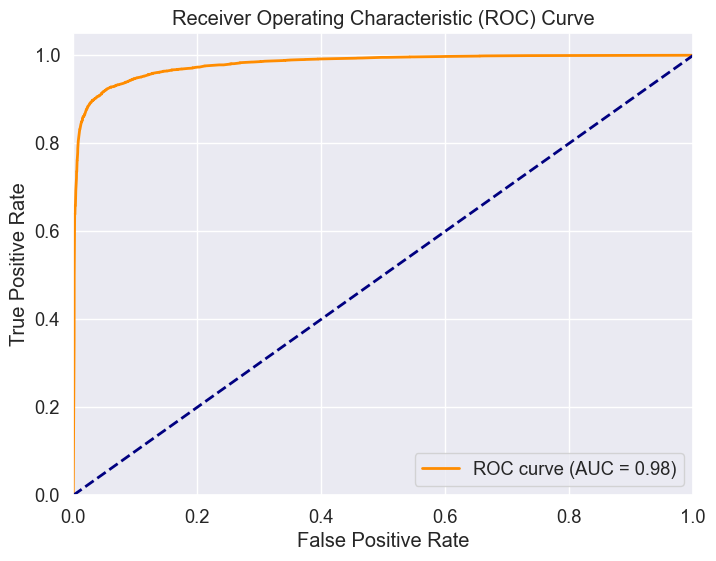

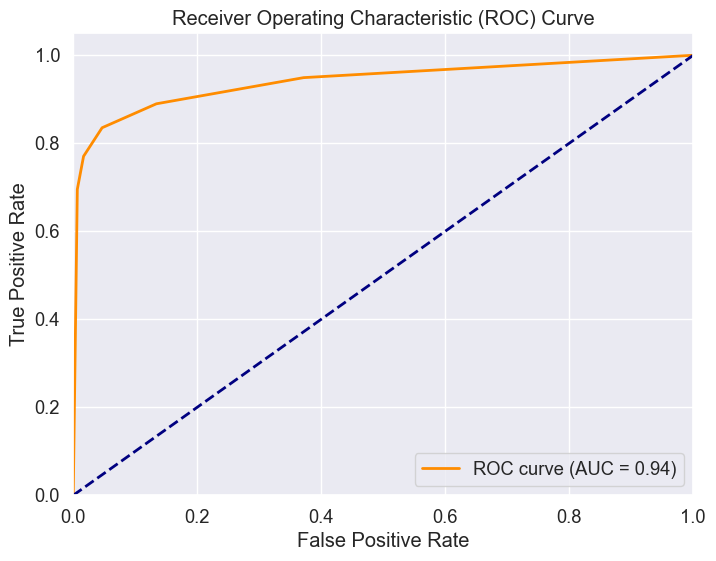

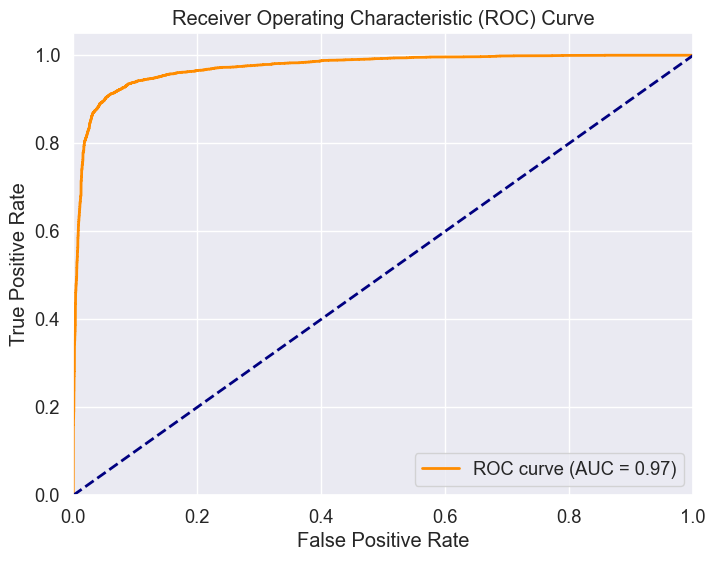

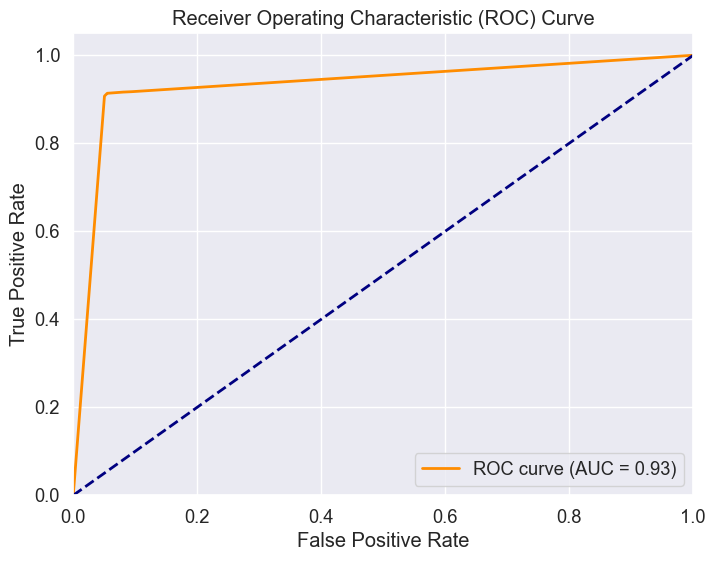

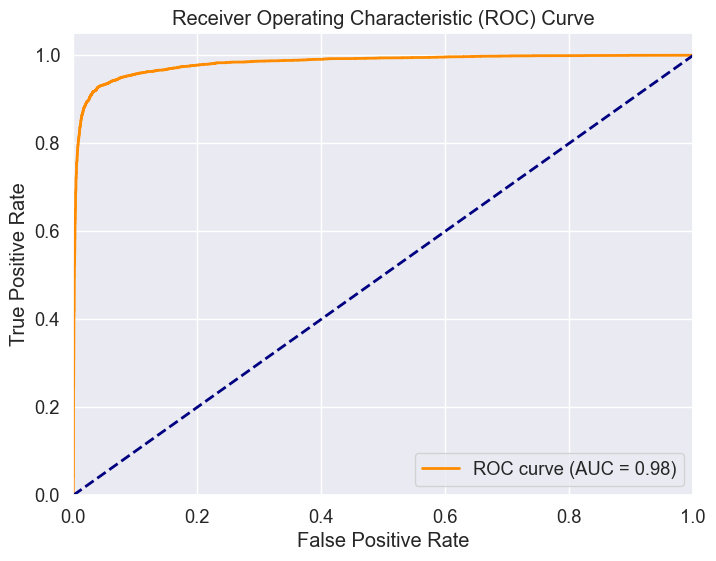

In [19]:
classifiers = [RandomForestClassifier(),KNeighborsClassifier(), MultinomialNB(),DecisionTreeClassifier(), SVC(probability=True)]

# Fit the classifier and obtain predicted probabilities for the positive class
for classifier in classifiers:
    classifier.fit(x_train_bow, y_train_bow)
    y_scores_bow = classifier.predict_proba(x_test_bow)[:,1]

    # Compute the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test_bow, y_scores_bow)

    # Calculate the AUC (Area Under the Curve) for the ROC curve
    roc_auc = roc_auc_score(y_test_bow, y_scores_bow)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
